In [1]:
library(AppliedPredictiveModeling)
data(schedulingData)

In [3]:
str(schedulingData)

'data.frame':	4331 obs. of  8 variables:
 $ Protocol   : Factor w/ 14 levels "A","C","D","E",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Compounds  : num  997 97 101 93 100 100 105 98 101 95 ...
 $ InputFields: num  137 103 75 76 82 82 88 95 91 92 ...
 $ Iterations : num  20 20 10 20 20 20 20 20 20 20 ...
 $ NumPending : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Hour       : num  14 13.8 13.8 10.1 10.4 ...
 $ Day        : Factor w/ 7 levels "Mon","Tue","Wed",..: 2 2 4 5 5 3 5 5 5 3 ...
 $ Class      : Factor w/ 4 levels "VF","F","M","L": 2 1 1 1 1 1 1 1 1 1 ...


In [4]:
#missing value
any(is.na(schedulingData))

[1] FALSE

In [2]:
predictors <- names(schedulingData[names(schedulingData)!="Class"])

In [8]:
library(Hmisc)
describe(schedulingData)

schedulingData 

 8  Variables      4331  Observations
--------------------------------------------------------------------------------
Protocol 
       n  missing distinct 
    4331        0       14 
                                                                            
Value          A     C     D     E     F     G     H     I     J     K     L
Frequency     94   160   149    96   170   155   321   381   989     6   242
Proportion 0.022 0.037 0.034 0.022 0.039 0.036 0.074 0.088 0.228 0.001 0.056
                            
Value          M     N     O
Frequency    451   536   581
Proportion 0.104 0.124 0.134
--------------------------------------------------------------------------------
Compounds 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    4331        0      858        1    497.7    650.5       27       37 
     .25      .50      .75      .90      .95 
      98      226      448      967     2512 

lowest :    20    21    22    23    24, hig

> 在过去的两年，HPC环境中的一些硬件发生变更。结果是，同样的两个作业在两个不同年份的硬件上会产生两个不同的执行时间。这会膨胀执行时间的内在变化，并潜在地导致错误标注观测类的标签。然而在分析中没有办法来处理这类误差，任何对执行时间分类的模型都应该随着时间的推移重新审视

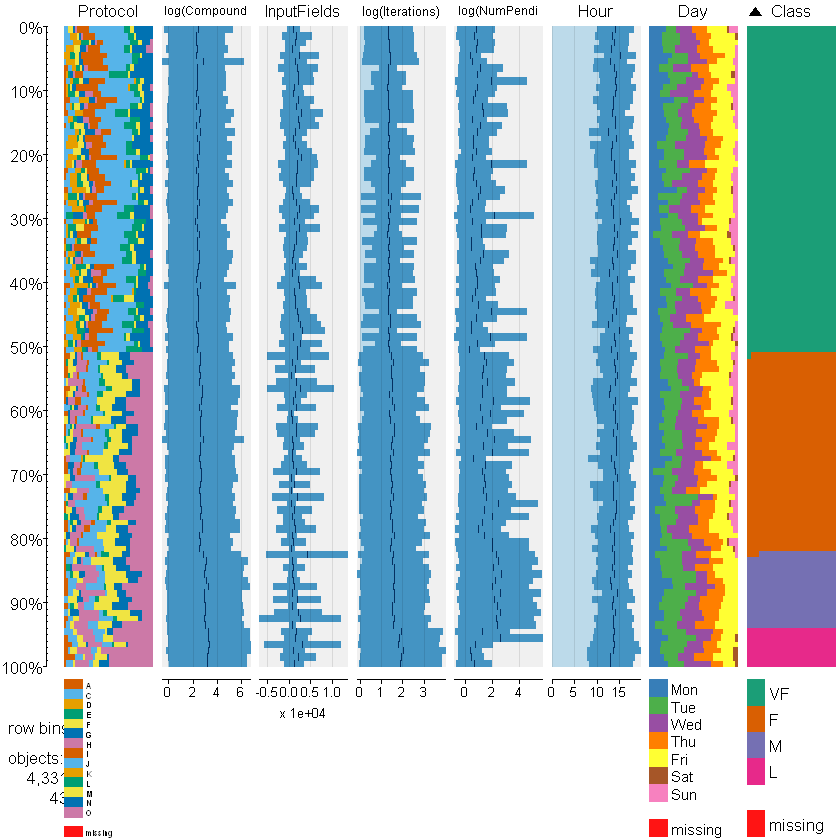

In [11]:
# https://cran.r-project.org/web/packages/tabplot/vignettes/tabplot-vignette.html
options(warn = -1)
library(tabplot)
tableplot(schedulingData,sortCol = Class,decreasing = F)

> 可以看到 
- 化合物数量大的作业更倾向于长时间或适中的执行时间；
- 很多中等长度的作业提交时作业挂起的数量很高。然而，在执行时间长的作业上这种趋势不会重现。正因为如此，提前确认这个观察结果并判断它是否是特定数据集的一个偶然现象至关重要。
- 当迭代次数较高，作业的执行时间相对较长。

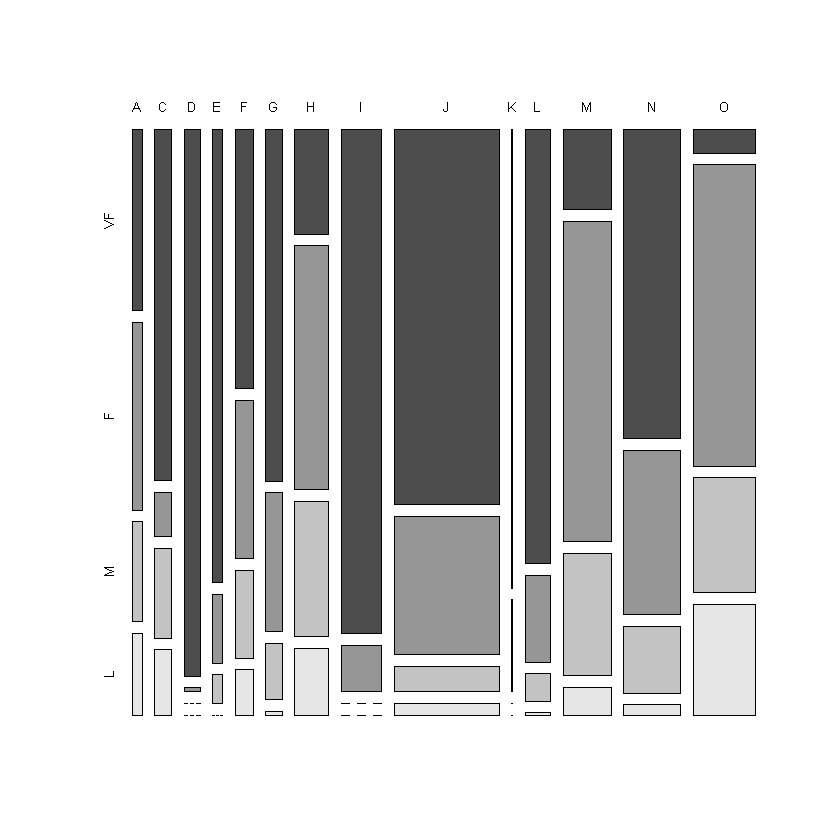

In [8]:
mosaicplot(table(schedulingData$Protocol,schedulingData$Class),
           main="",color = T)

> 图中，(横向)箱子的宽度表示协议运行的作业数，协议J运行做多，协议K运行最少；(纵向) 协议D比较容易被快速执行。

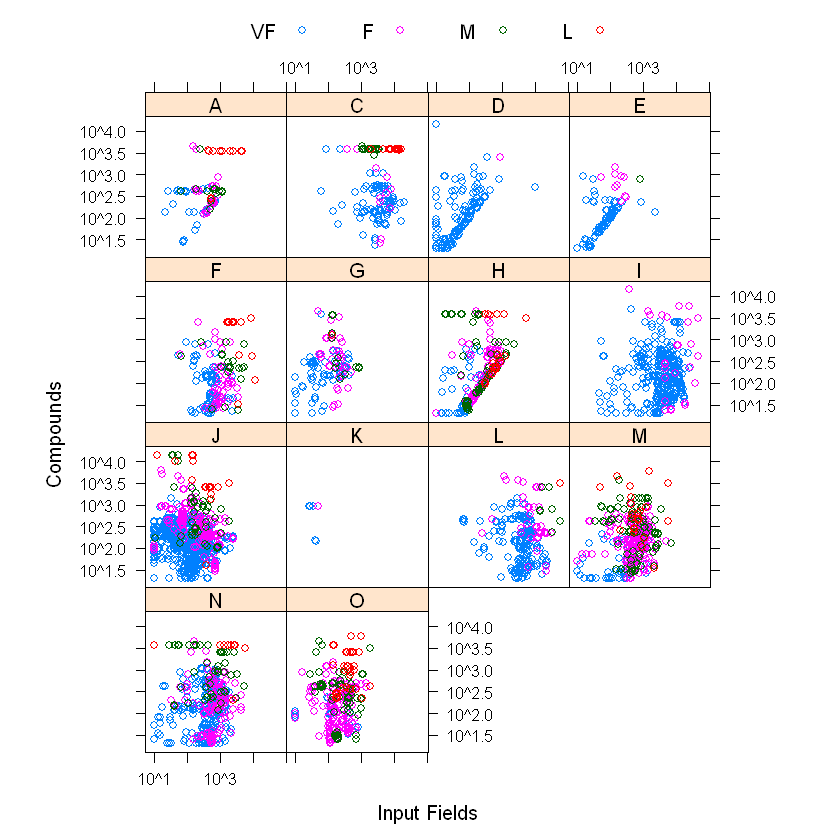

In [9]:
library(lattice)
xyplot(Compounds ~ InputFields|Protocol,
       data = schedulingData,
       scales = list(x = list(log = 10), y = list(log = 10)),
       groups = Class,
       xlab = "Input Fields",
       auto.key = list(columns = 4),
       aspect = 1,
       as.table = TRUE)